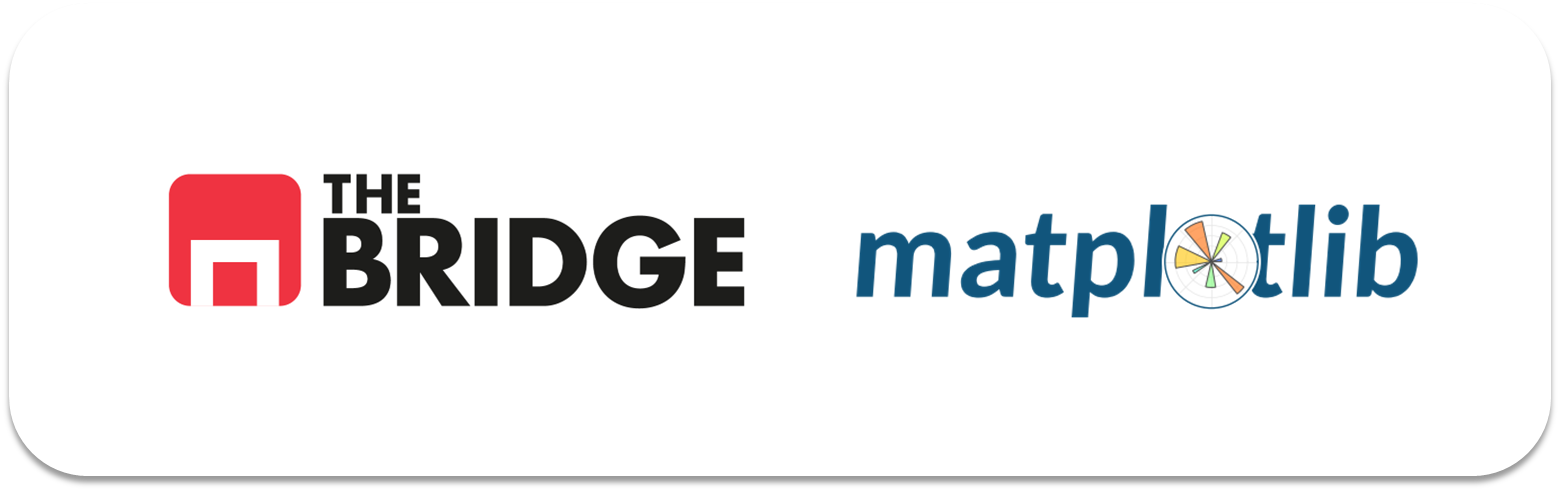

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [35]:
california = pd.read_csv("./data/california_cities.csv")
california = california.dropna()
california

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center").
2. Histograma del área total ocupada por las ciudades.
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

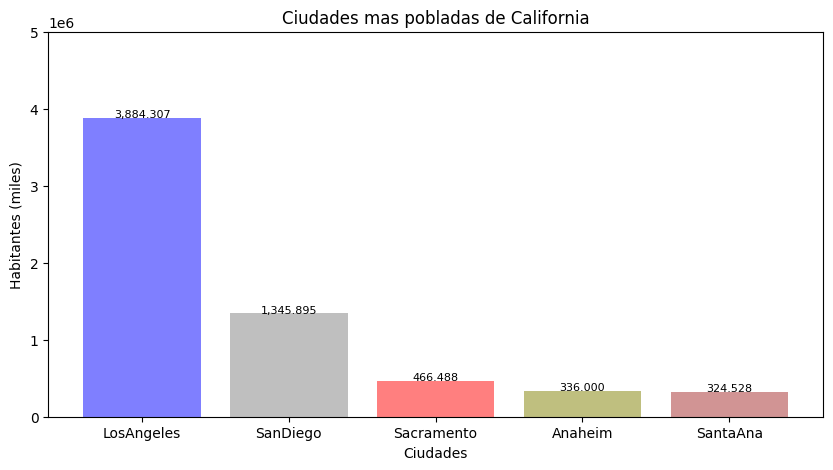

In [56]:
california_sorted = california.sort_values(by='population_total', ascending=False)
top5_cities = california_sorted.head(5)

colores = ["blue", "gray", "r", "olive", "brown"]

plt.figure(figsize=(10, 5))

bars = plt.bar(top5_cities["city"], height=top5_cities["population_total"], color=colores, alpha=0.5)

for bar, population in zip(bars, top5_cities["population_total"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, '{:,.3f}'.format(population / 1000),
             ha='center', color='black', fontsize=8)

plt.ylim(0,5000000)
plt.xlabel("Ciudades")
plt.ylabel("Habitantes (miles)")
plt.title("Ciudades mas pobladas de California")

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


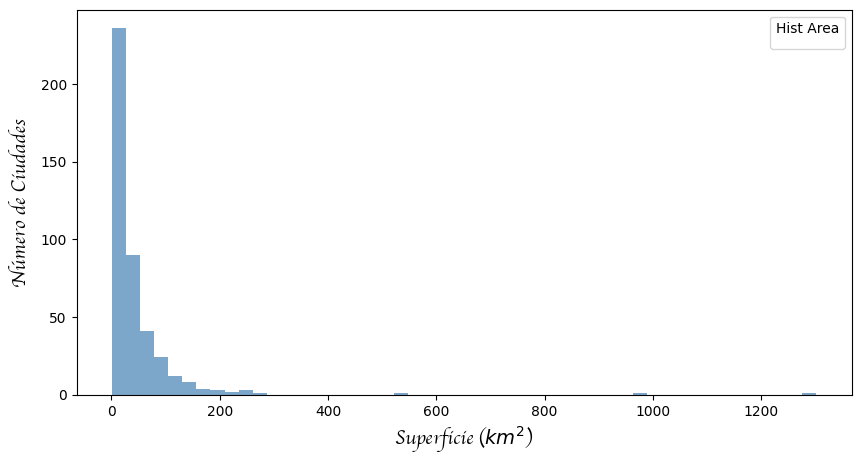

In [81]:

filtered_cities = california.dropna(subset=['area_total_km2'])

plt.figure(figsize=(10, 5))

plt.hist(filtered_cities['area_total_km2'], bins=50, color='steelblue', alpha=0.7)

font= {'fontname': 'Apple Chancery'}

plt.xlabel('Superficie ($km^2$) ', **font, fontsize=14)
plt.ylabel('Número de Ciudades', **font, fontsize=14)

plt.legend(loc = "upper right", title = "Hist Area")

plt.show()


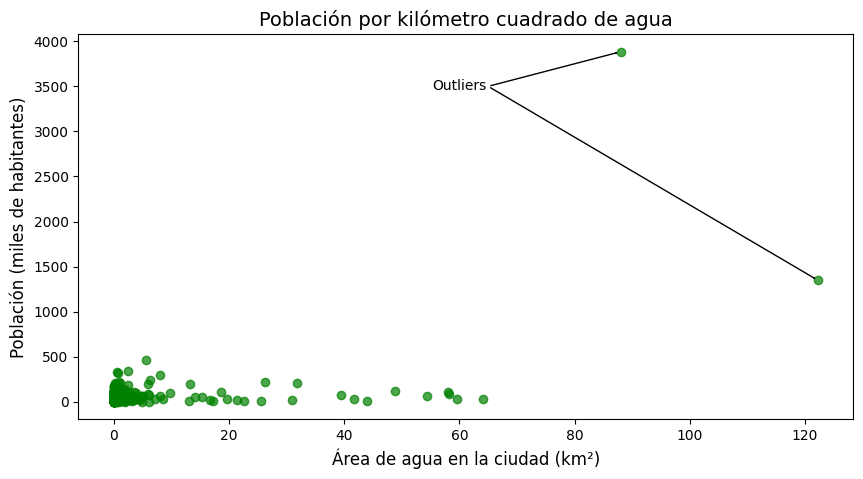

In [144]:

plt.figure(figsize=(10, 5))

filtered_cities = california.dropna(subset=['population_total', 'area_water_km2'])

plt.scatter(filtered_cities['area_water_km2'], filtered_cities['population_total'] / 1000, color='green', alpha=0.7)

plt.xlabel('Área de agua en la ciudad (km²)', fontsize=12)
plt.ylabel('Población (miles de habitantes)',fontsize=12)
plt.title('Población por kilómetro cuadrado de agua', fontsize=14)


texto_x = 60
texto_y = 3500

plt.text(texto_x, texto_y, 'Outliers', ha='center', va='center', fontsize=10, color='black')

from matplotlib.patches import FancyArrowPatch
umbral_area = 80 
umbral_poblacion = 1000 
outliers = (filtered_cities['area_water_km2'] > umbral_area) & (filtered_cities['population_total'] > umbral_poblacion)
for x, y in zip(filtered_cities['area_water_km2'][outliers], filtered_cities['population_total'][outliers] / 1000):
    arrow = FancyArrowPatch((65, 3500), (x, y), arrowstyle='->, head_width=0.2', color='black', connectionstyle="arc3,rad=0")
    plt.gca().add_patch(arrow)

plt.show()



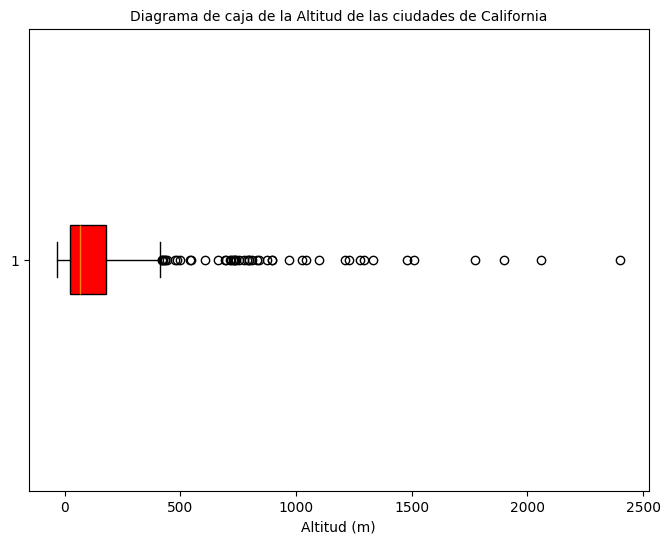

In [150]:
plt.figure(figsize=(8, 6))

plt.boxplot(california['elevation_m'], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))

plt.xlabel('Altitud (m)')
plt.title('Diagrama de caja de la Altitud de las ciudades de California', fontsize=10)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


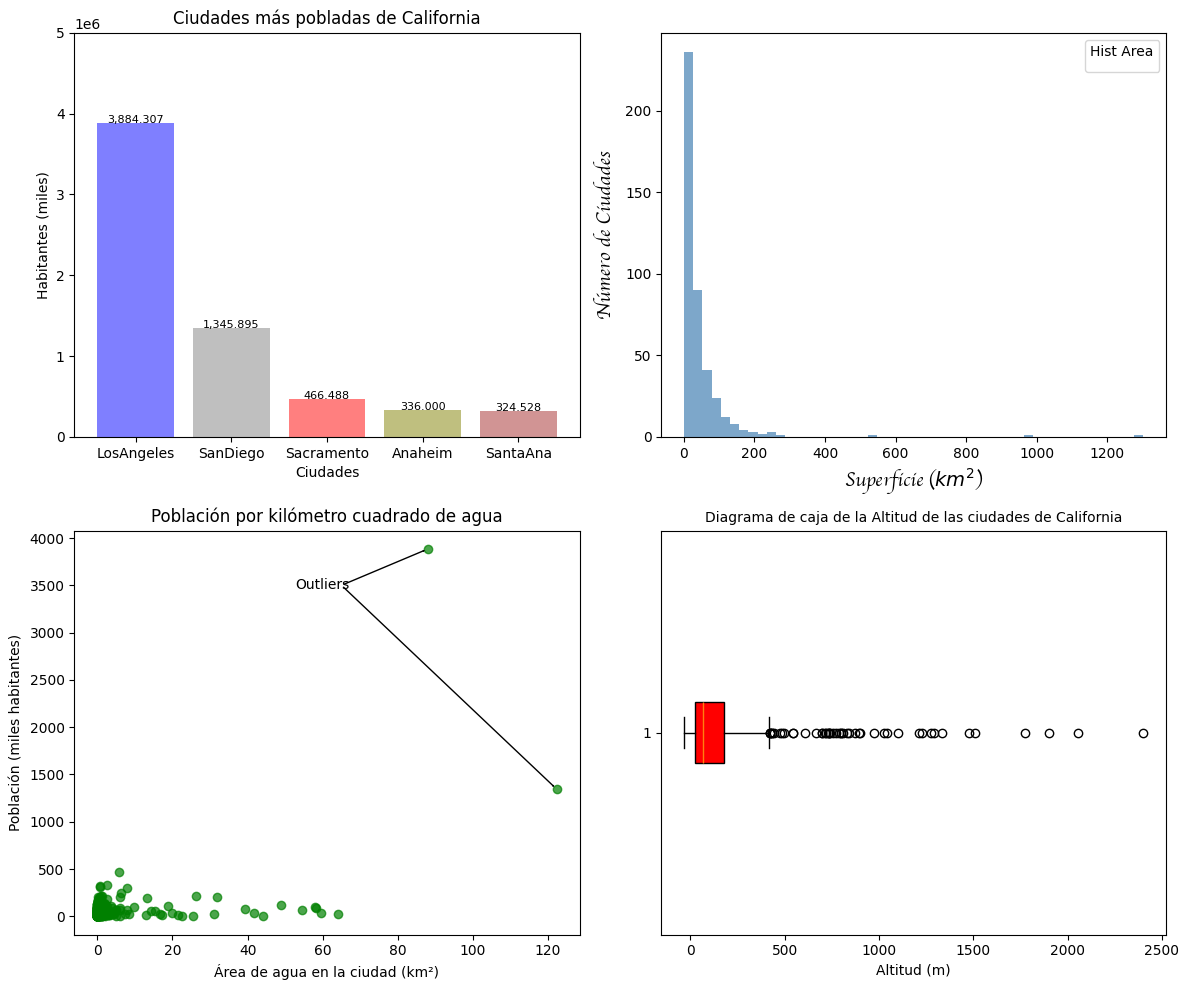

In [158]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


california_sorted = california.sort_values(by='population_total', ascending=False)
top5_cities = california_sorted.head(5)
colores = ["blue", "gray", "r", "olive", "brown"]
bars = axes[0, 0].bar(top5_cities["city"], height=top5_cities["population_total"], color=colores, alpha=0.5)

for bar, population in zip(bars, top5_cities["population_total"]):
    axes[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, '{:,.3f}'.format(population / 1000),
                    ha='center', color='black', fontsize=8)

axes[0, 0].set_ylim(0, 5000000)
axes[0, 0].set_xlabel("Ciudades")
axes[0, 0].set_ylabel("Habitantes (miles)")
axes[0, 0].set_title("Ciudades más pobladas de California")



axes[0, 1].hist(california['area_total_km2'], bins=50, color='steelblue', alpha=0.7)

font= {'fontname': 'Apple Chancery'}
axes[0, 1].set_xlabel('Superficie ($km^2$) ', **font, fontsize=14)
axes[0, 1].set_ylabel('Número de Ciudades', **font, fontsize=14)
axes[0, 1].legend(loc="upper right", title="Hist Area")



axes[1, 0].scatter(california['area_water_km2'], california['population_total'] / 1000, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Área de agua en la ciudad (km²)')
axes[1, 0].set_ylabel('Población (miles habitantes)')
axes[1, 0].set_title('Población por kilómetro cuadrado de agua')

texto_x = 60
texto_y = 3500
axes[1, 0].text(texto_x, texto_y, 'Outliers', ha='center', va='center', fontsize=10, color='black')

umbral_area = 80 
umbral_poblacion = 1000 
outliers = (california['area_water_km2'] > umbral_area) & (california['population_total'] > umbral_poblacion)
for x, y in zip(california['area_water_km2'][outliers], california['population_total'][outliers] / 1000):
    arrow = FancyArrowPatch((65, 3500), (x, y), arrowstyle='->', color='black', connectionstyle="arc3,rad=0")
    axes[1, 0].add_patch(arrow)


axes[1, 1].boxplot(california['elevation_m'], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
axes[1, 1].set_xlabel('Altitud (m)')
axes[1, 1].set_title('Diagrama de caja de la Altitud de las ciudades de California', fontsize=10)

plt.tight_layout()

plt.show()


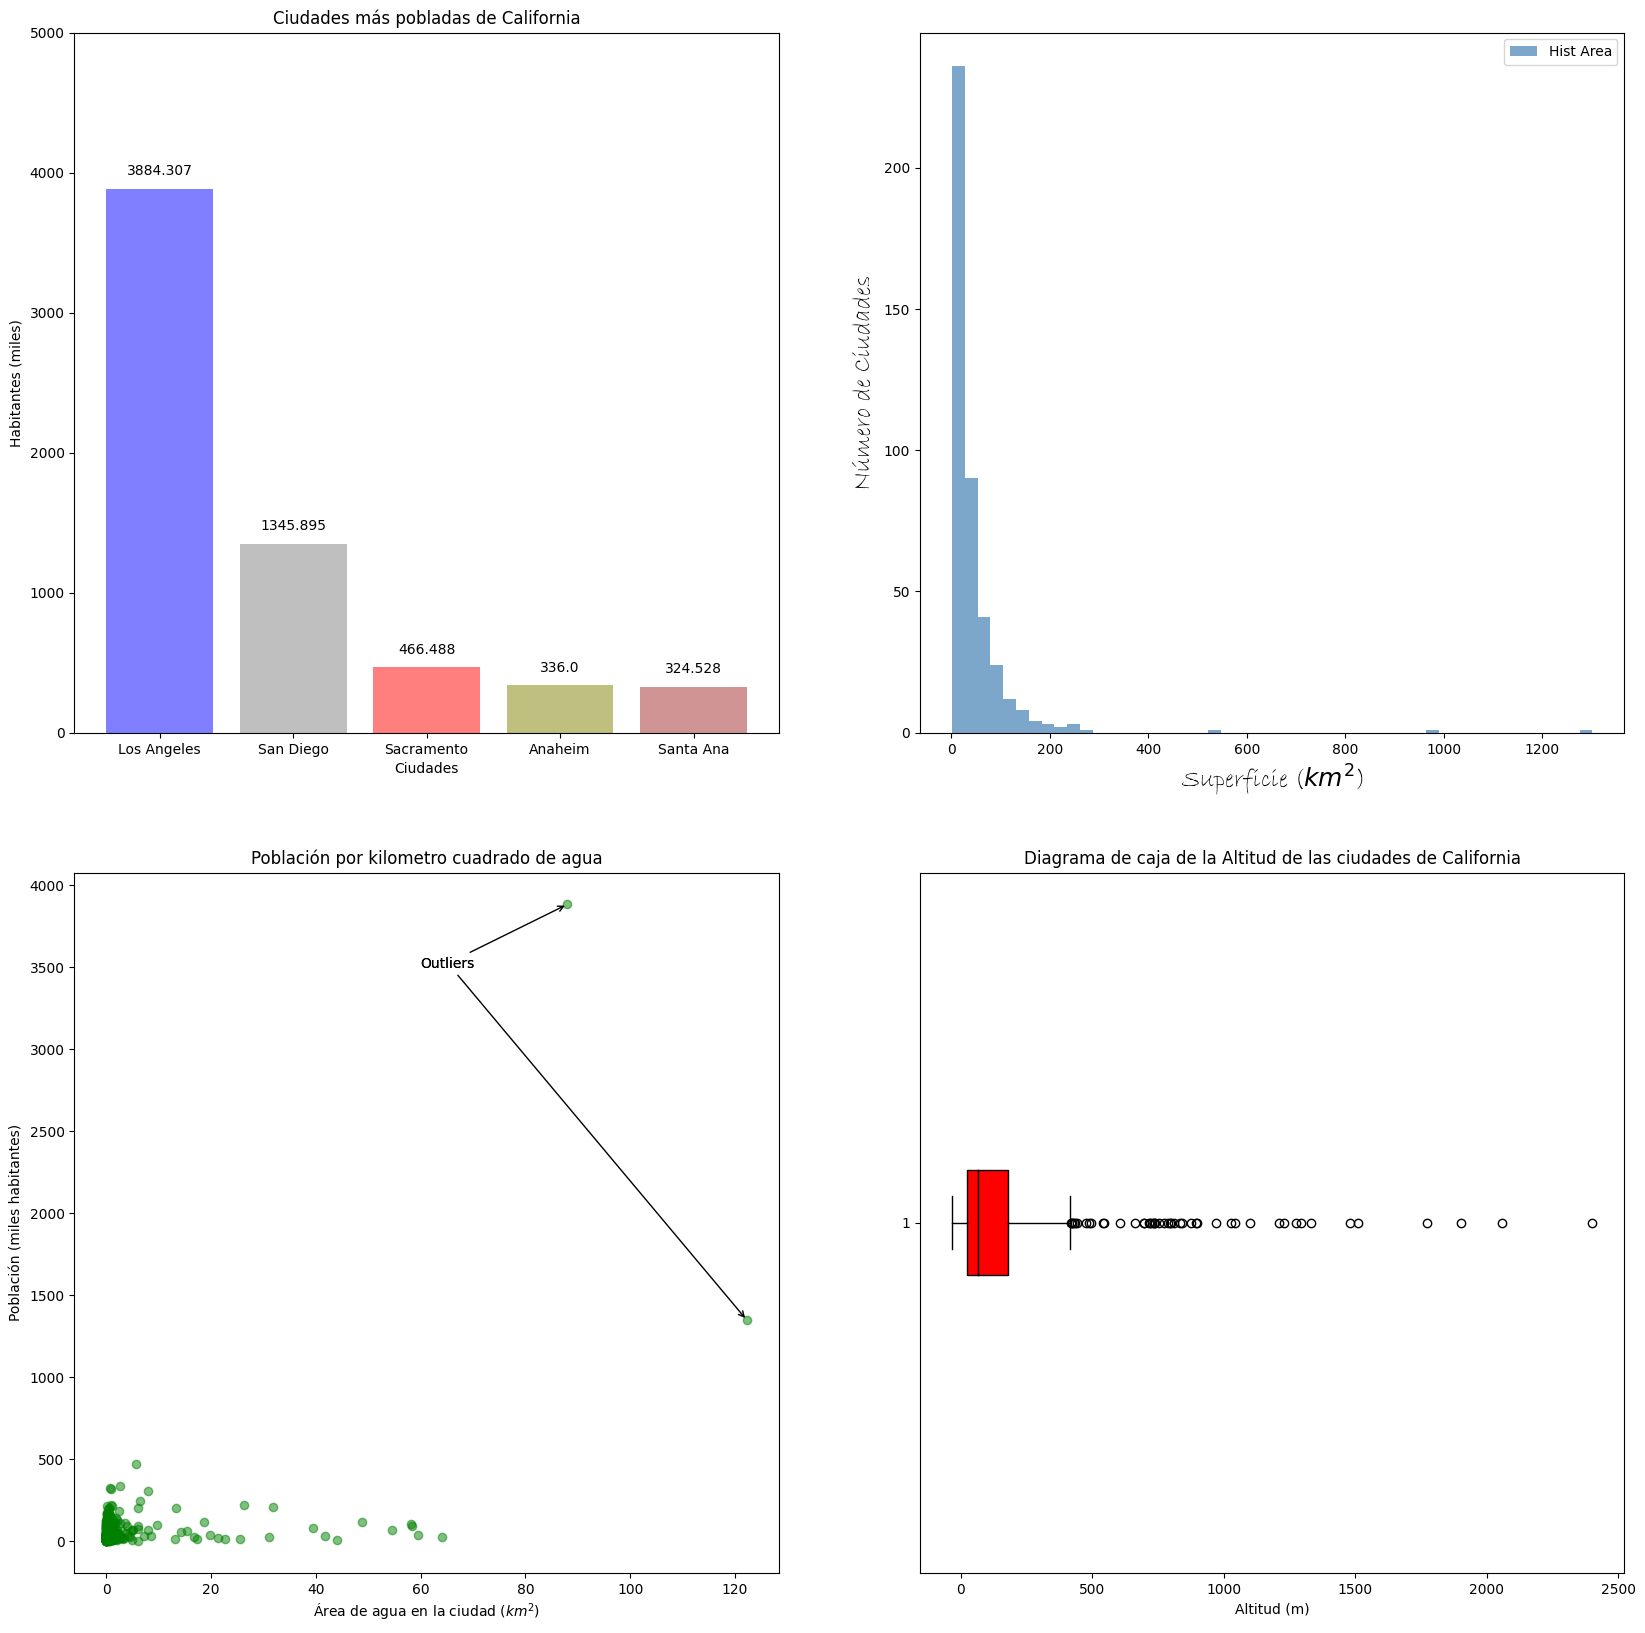

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


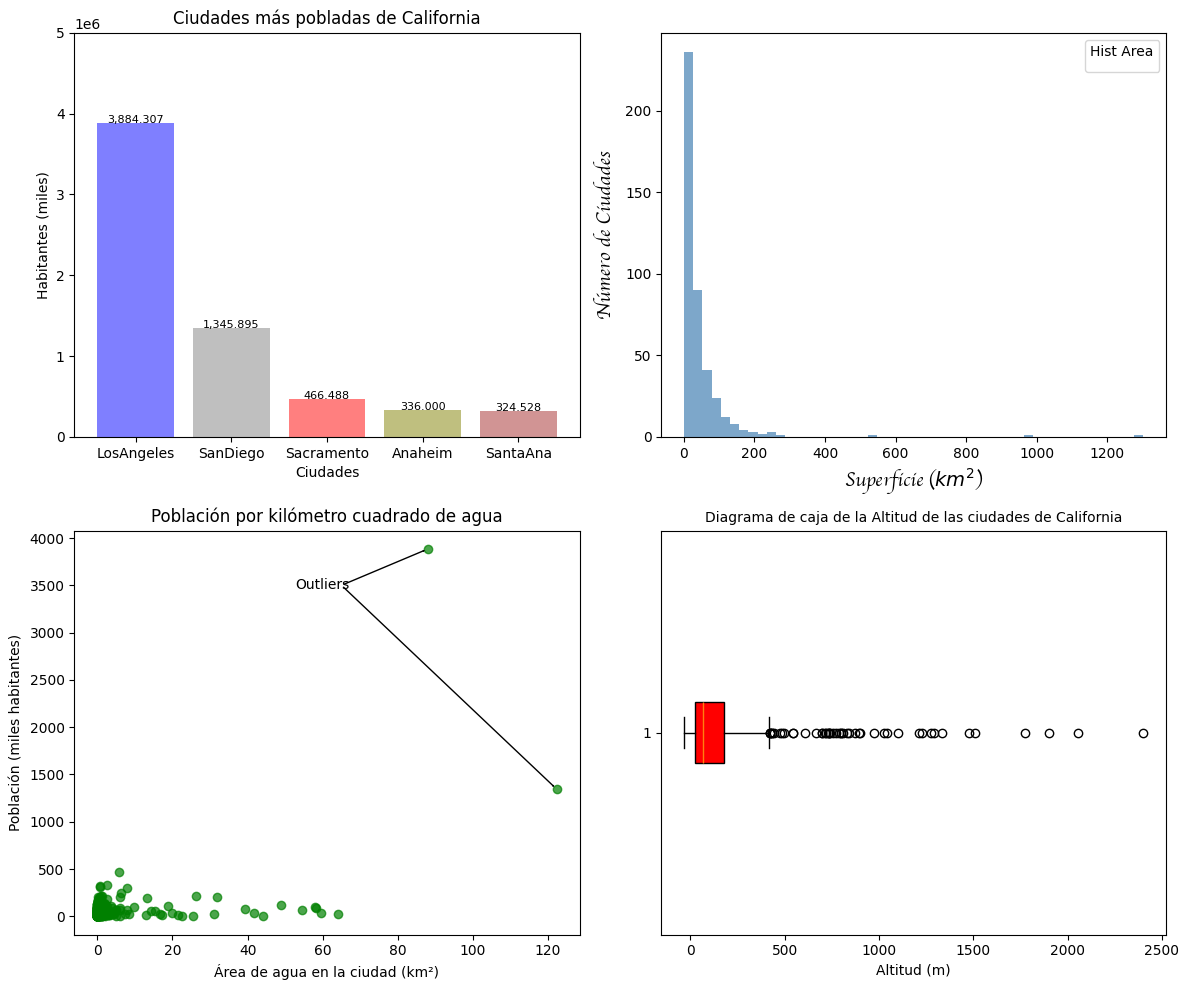

In [160]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


california_sorted = california.sort_values(by='population_total', ascending=False)
top5_cities = california_sorted.head(5)
colores = ["blue", "gray", "r", "olive", "brown"]
bars = axes[0, 0].bar(top5_cities["city"], height=top5_cities["population_total"], color=colores, alpha=0.5)

for bar, population in zip(bars, top5_cities["population_total"]):
    axes[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, '{:,.3f}'.format(population / 1000),
                    ha='center', color='black', fontsize=8)

axes[0, 0].set_ylim(0, 5000000)
axes[0, 0].set_xlabel("Ciudades")
axes[0, 0].set_ylabel("Habitantes (miles)")
axes[0, 0].set_title("Ciudades más pobladas de California")



axes[0, 1].hist(california['area_total_km2'], bins=50, color='steelblue', alpha=0.7)

font= {'fontname': 'Apple Chancery'}
axes[0, 1].set_xlabel('Superficie ($km^2$) ', **font, fontsize=14)
axes[0, 1].set_ylabel('Número de Ciudades', **font, fontsize=14)
axes[0, 1].legend(loc="upper right", title="Hist Area")



axes[1, 0].scatter(california['area_water_km2'], california['population_total'] / 1000, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Área de agua en la ciudad (km²)')
axes[1, 0].set_ylabel('Población (miles habitantes)')
axes[1, 0].set_title('Población por kilómetro cuadrado de agua')

texto_x = 60
texto_y = 3500
axes[1, 0].text(texto_x, texto_y, 'Outliers', ha='center', va='center', fontsize=10, color='black')

umbral_area = 80 
umbral_poblacion = 1000 
outliers = (california['area_water_km2'] > umbral_area) & (california['population_total'] > umbral_poblacion)
for x, y in zip(california['area_water_km2'][outliers], california['population_total'][outliers] / 1000):
    arrow = FancyArrowPatch((65, 3500), (x, y), arrowstyle='->', color='black', connectionstyle="arc3,rad=0")
    axes[1, 0].add_patch(arrow)


axes[1, 1].boxplot(california['elevation_m'], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
axes[1, 1].set_xlabel('Altitud (m)')
axes[1, 1].set_title('Diagrama de caja de la Altitud de las ciudades de California', fontsize=10)

plt.tight_layout()
plt.savefig('practica.png')
plt.show()
